In [25]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas import DataFrame
import pyflux as pf
import datetime
import matplotlib.pyplot as plt
import datetime
import quandl
%matplotlib inline
%config InlineBackend.figure_formats=['png']
%matplotlib inline 
start = datetime.datetime(2004, 11, 22)
end = datetime.datetime(2017, 1, 27)

data = web.DataReader('GLD', data_source='yahoo', end='2011-10-31')['Adj Close']

In [26]:
data = pd.DataFrame(data)

In [27]:
data.tail()

,Adj Close
Date,
2011-10-25,165.589996
2011-10-26,167.399994
2011-10-27,169.550003
2011-10-28,169.619995
2011-10-31,167.339996


In [28]:
data.rename(columns={'Adj Close': 'price'}, inplace=True)

In [29]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [30]:
data.dropna(inplace=True)

In [31]:
lags = 50

In [32]:
m = np.zeros((lags + 1, len(data) - lags))

In [33]:
for i in range(lags + 1):
            if i == lags:
                m[i] = data.returns.values[i:]
            else:
                m[i] = data.returns.values[i:i - lags]

In [34]:
from sklearn import linear_model

In [35]:
lm = linear_model.LogisticRegression(C=1e3)

In [36]:
lm.fit(m[:lags].T, np.sign(m[lags]))

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
data['prediction'] = 0.0

In [38]:
data['prediction'].ix[lags:] = lm.predict(m[:lags].T)

In [39]:
hits = np.sign(data['returns'].ix[lags:] *
                        data['prediction'].ix[lags:]).value_counts()

In [40]:
hits

 1.0    277
-1.0    133
 0.0      1
dtype: int64

In [41]:
hits.values[0] / sum(hits)

0.67396593673965932

In [42]:
data['strategy'] = data['prediction'] * data['returns']

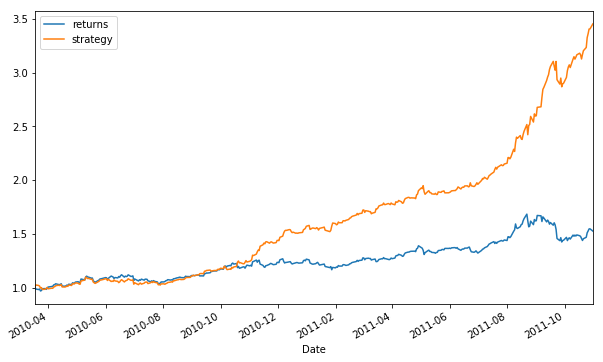

In [43]:
data[['returns', 'strategy']].ix[lags:].cumsum(
                    ).apply(np.exp).plot(figsize=(10, 6))

Prophet test

In [44]:
import itertools
import numpy as np
import pyflux as pf
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from pandas import DataFrame, read_csv
import datetime
import quandl
%matplotlib inline
%config InlineBackend.figure_formats=['png']

In [45]:
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime(2017, 1, 27)

##data source quandl = gold priced in USD
data = quandl.get("BUNDESBANK/BBK01_WT5511", authtoken="LSQt2S1x-abvHTx_Lavx")
data.tail()

,Value
Date,
2016-04-12,1259.20
2016-04-13,1245.75
2016-04-14,1240.30
2016-04-15,1229.75
2016-04-18,1237.70


In [46]:
data.to_csv('gold.csv')

In [47]:
# I had to manually DL to CSV then Rename HeaderRows to DF and Y

In [48]:
import pandas as pd
df = pd.read_csv('gld.csv')
df.head()

,ds,y
0,4/1/1968,38.0
1,4/2/1968,37.6
2,4/3/1968,37.7
3,4/4/1968,36.7
4,4/5/1968,37.2


In [49]:
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,4/1/1968,3.637586
1,4/2/1968,3.627004
2,4/3/1968,3.629660
3,4/4/1968,3.602777
4,4/5/1968,3.616309


In [50]:
from fbprophet import Prophet

In [51]:
m = Prophet()

In [52]:
m.fit(df);

In [53]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
12512,2017-04-14
12513,2017-04-15
12514,2017-04-16
12515,2017-04-17
12516,2017-04-18


In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12512,2017-04-14,7.472007,7.284165,7.668901
12513,2017-04-15,7.418463,7.223270,7.612705
12514,2017-04-16,7.418405,7.233486,7.610911
12515,2017-04-17,7.471745,7.268948,7.650587
12516,2017-04-18,7.470948,7.279714,7.661663


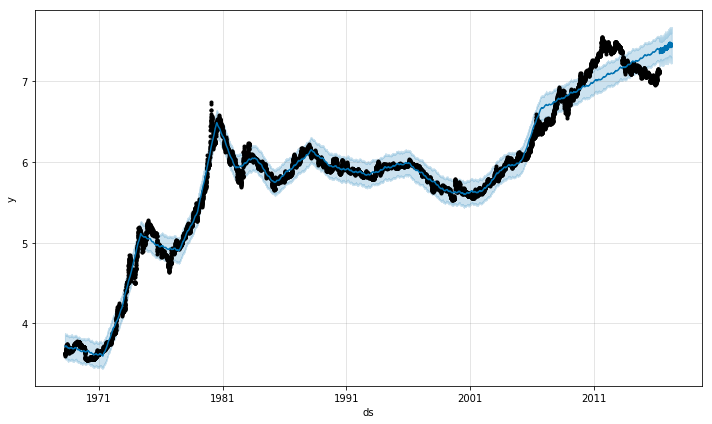

In [55]:
m.plot(forecast);

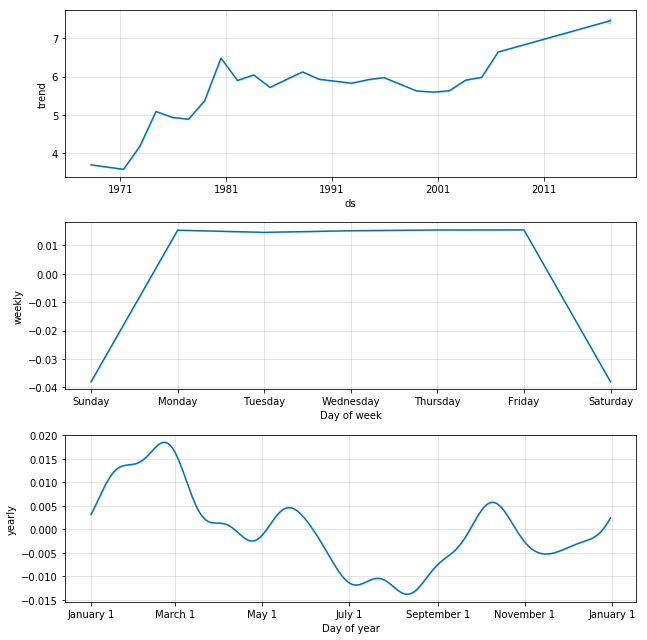

In [56]:
m.plot_components(forecast);